# WALMART ANALYTICS


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [43]:
train_df = pd.read_csv(r"E:\ML_NOTES\DEVTOWN\Python_Notes\train_walmart.csv")
stores = pd.read_csv(r"E:\ML_NOTES\DEVTOWN\Python_Notes\stores.csv")
features = pd.read_csv(r"E:\ML_NOTES\DEVTOWN\Python_Notes\features.csv")


In [44]:
train_df


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [45]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [46]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [51]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [48]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [56]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [55]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [57]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [58]:
features.shape

(8190, 12)

In [59]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [60]:
features.drop(['MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1,inplace=True)

In [61]:
features.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [62]:
features.fillna(method='ffill',axis=0,inplace=True)

In [15]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [63]:
features

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,193.589304,8.335,False
8186,45,2013-07-05,77.50,3.614,193.589304,8.335,False
8187,45,2013-07-12,79.37,3.614,193.589304,8.335,False
8188,45,2013-07-19,82.84,3.737,193.589304,8.335,False


In [64]:
# inner
df = train_df.merge(stores,how='inner',on=['Store'])

In [65]:
train_df.shape

(421570, 5)

In [66]:
df.shape

(421570, 7)

In [67]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

In [68]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [69]:
df = df.merge(features,how='inner',on=['Store','Date','IsHoliday'])

In [70]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667


In [72]:
#### date column in datetime - create new column- year & week
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df['Week'] = df.Date.dt.isocalendar().week

In [74]:
df['Year'] = df.Date.dt.isocalendar().year

In [75]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [76]:
#### write the functions that can take feature name as input & create a scatter plot of that given features & weekily sales


In [77]:
def scatter(column):
    plt.figure(figsize=(12,5))
    plt.scatter(df[column],df['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)    

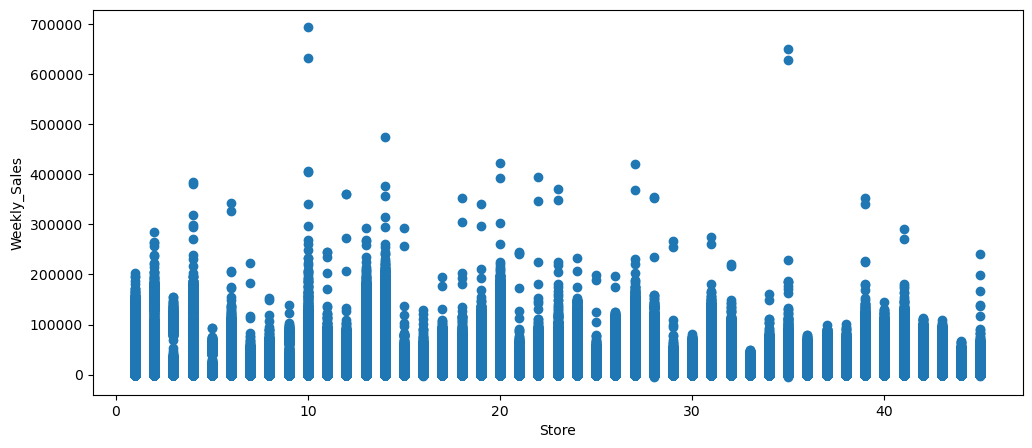

In [78]:
scatter('Store')

In [79]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year'],
      dtype='object')

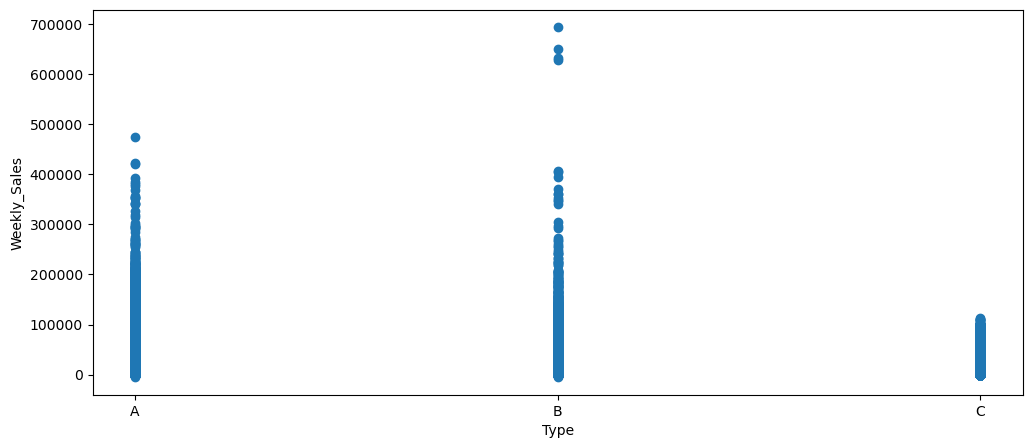

In [80]:
scatter('Type')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  Week          421570 non-null  UInt32        
 12  Year          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 39.8+ MB


In [82]:
# df['Week']=df['Week'].astype(float)

In [83]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  Week          421570 non-null  UInt32        
 12  Year          421570 non-null  UInt32        
dtypes: UInt32(2), bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 39.8+ MB


In [84]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            421560, 421561, 421562, 421563, 421564, 421565, 421566, 421567,
            421568, 421569],
           dtype='int64', length=421570)

In [85]:
df.values

array([[1, 1, Timestamp('2010-02-05 00:00:00'), ..., 8.106, 5, 2010],
       [1, 2, Timestamp('2010-02-05 00:00:00'), ..., 8.106, 5, 2010],
       [1, 3, Timestamp('2010-02-05 00:00:00'), ..., 8.106, 5, 2010],
       ...,
       [45, 95, Timestamp('2012-10-26 00:00:00'), ..., 8.667, 43, 2012],
       [45, 97, Timestamp('2012-10-26 00:00:00'), ..., 8.667, 43, 2012],
       [45, 98, Timestamp('2012-10-26 00:00:00'), ..., 8.667, 43, 2012]],
      dtype=object)

In [86]:
####

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

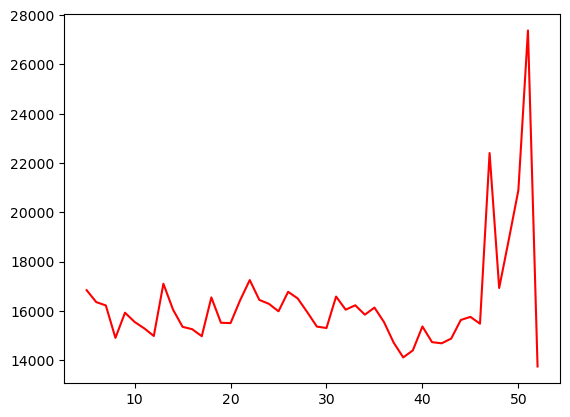

In [87]:
#### Line charts for weekly sales
#### avg. weekly sales for the year 2010

x = df[df['Year']==2010].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=x.index,y=x.values,color='red')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

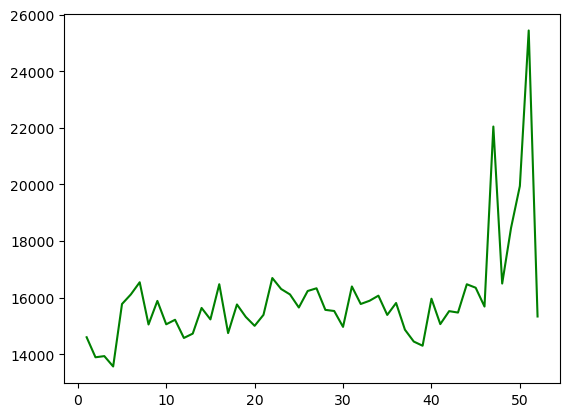

In [88]:
y = df[df['Year']==2011].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=y.index,y=y.values,color='green')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

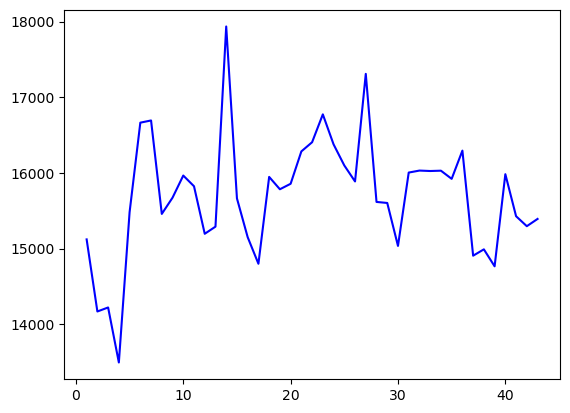

In [89]:
z = df[df['Year']==2012].groupby(['Week'])['Weekly_Sales'].mean()
sns.lineplot(x=z.index,y=z.values,color='blue')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

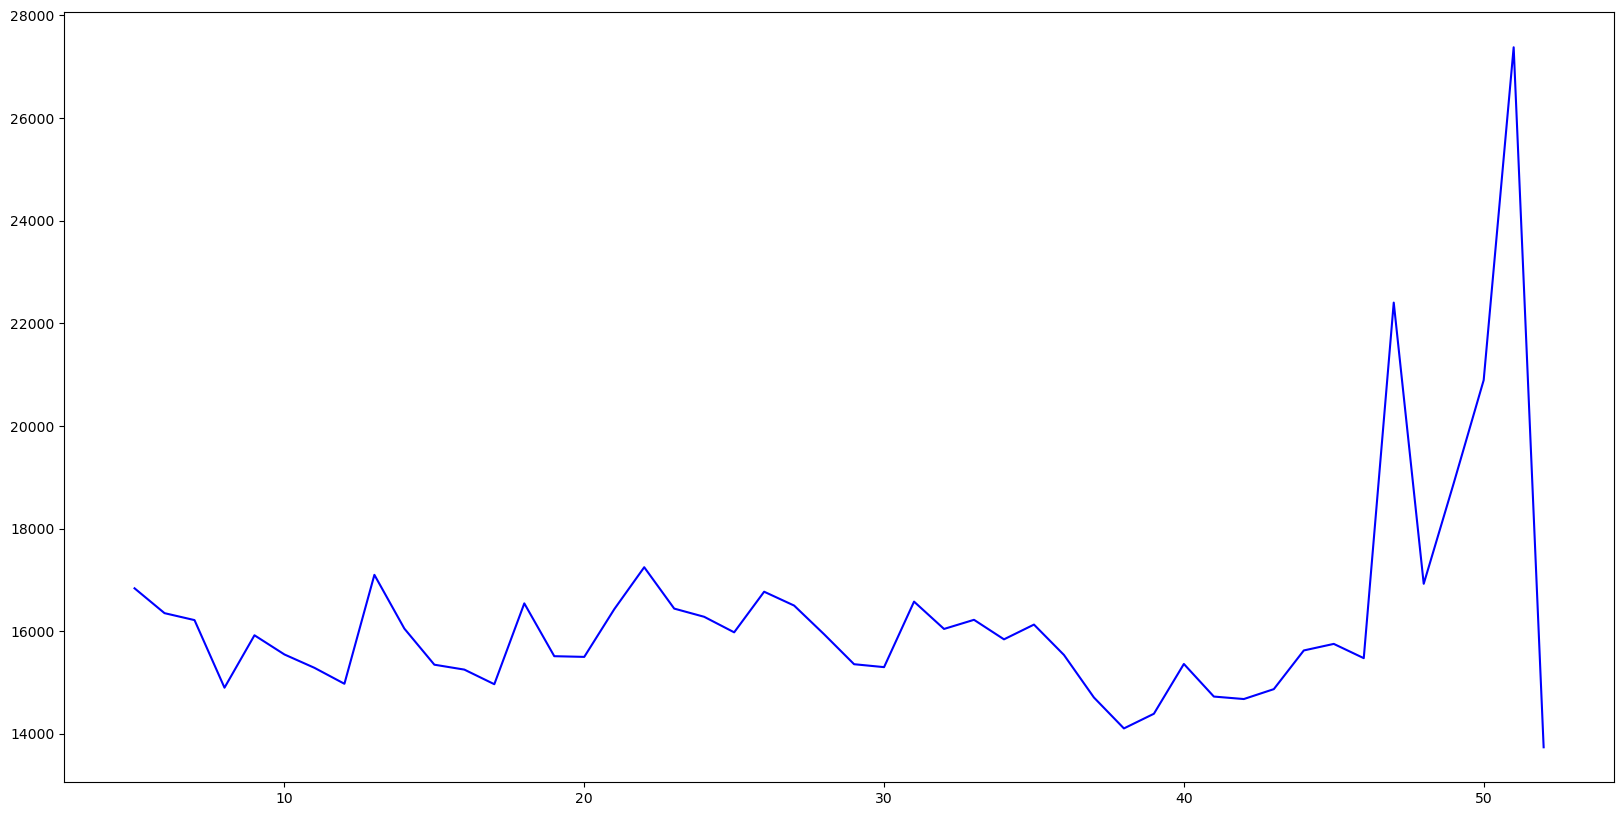

In [93]:
plt.figure(figsize=(20,10))
sns.lineplot(x=x.index,y=x.values,color='blue')
sns.lineplot(x=y.index,y=y.values,color='red')
sns.lineplot(x=z.index,y=z.values,color='green')
plt.grid()
plt.xticks(np.arange(1,60,step=1))
plt.legend(['2010','2011','2012'])
plt.xlabel('Week',fontsize=16)
plt.ylabel('Sales',fontsize=16)


C:\Users\cp\AppData\Local\Temp\ipykernel_11416\2765403504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Weekly_Sales'],color='red')


<Axes: ylabel='Density'>

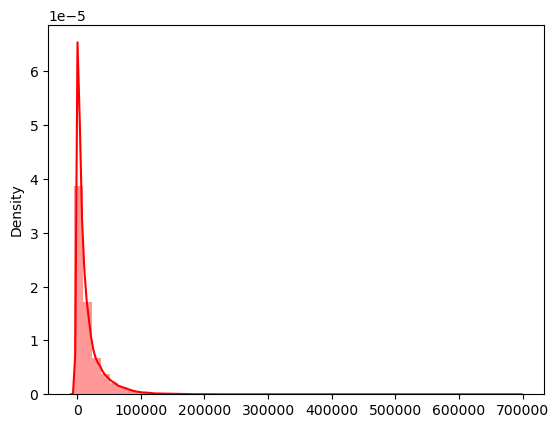

In [94]:
sns.distplot(x=df['Weekly_Sales'],color='red')

In [95]:
### plot the stores with highest average sales
### plot the department with highest average sale


In [96]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [97]:
Weekly_Stores = df.groupby(['Store'])['Weekly_Sales'].mean().reset_index()

In [98]:
Weekly_Stores = Weekly_Stores.set_index('Store')

In [99]:
Weekly_Stores

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [100]:
Weekly_Stores.sort_values('Weekly_Sales').style.bar(align='left')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


In [101]:
Weekly_Stores.values.reshape(-1)

array([21710.54362066, 26898.07003126,  6373.03398296, 29161.21041472,
        5053.41581287, 21913.24362354,  8358.76614833, 13133.01476806,
        8772.89037893, 26332.30381871, 19276.76275094, 14867.30861927,
       27355.13689135, 28784.85172709,  9002.49307343,  7863.22412369,
       12954.39363646, 15733.31313622, 20362.12673433, 29508.30159193,
       11283.43549572, 15181.21888625, 19776.1808806 , 18969.1064998 ,
       10308.15781008, 14554.12967221, 24826.98453594, 18714.88980322,
        8158.8106092 ,  8764.2377194 , 19681.90746401, 16351.62185454,
        5728.41405272, 13522.08167058, 13803.59698573,  8584.41256348,
       10297.35502637,  7492.47845966, 21000.76356246, 13763.63280323,
       17976.0046481 , 11443.37011793, 13415.11411791,  6038.92981448,
       11662.89731452])

Text(0.5, 1.0, 'Weekly Sales per Stores')

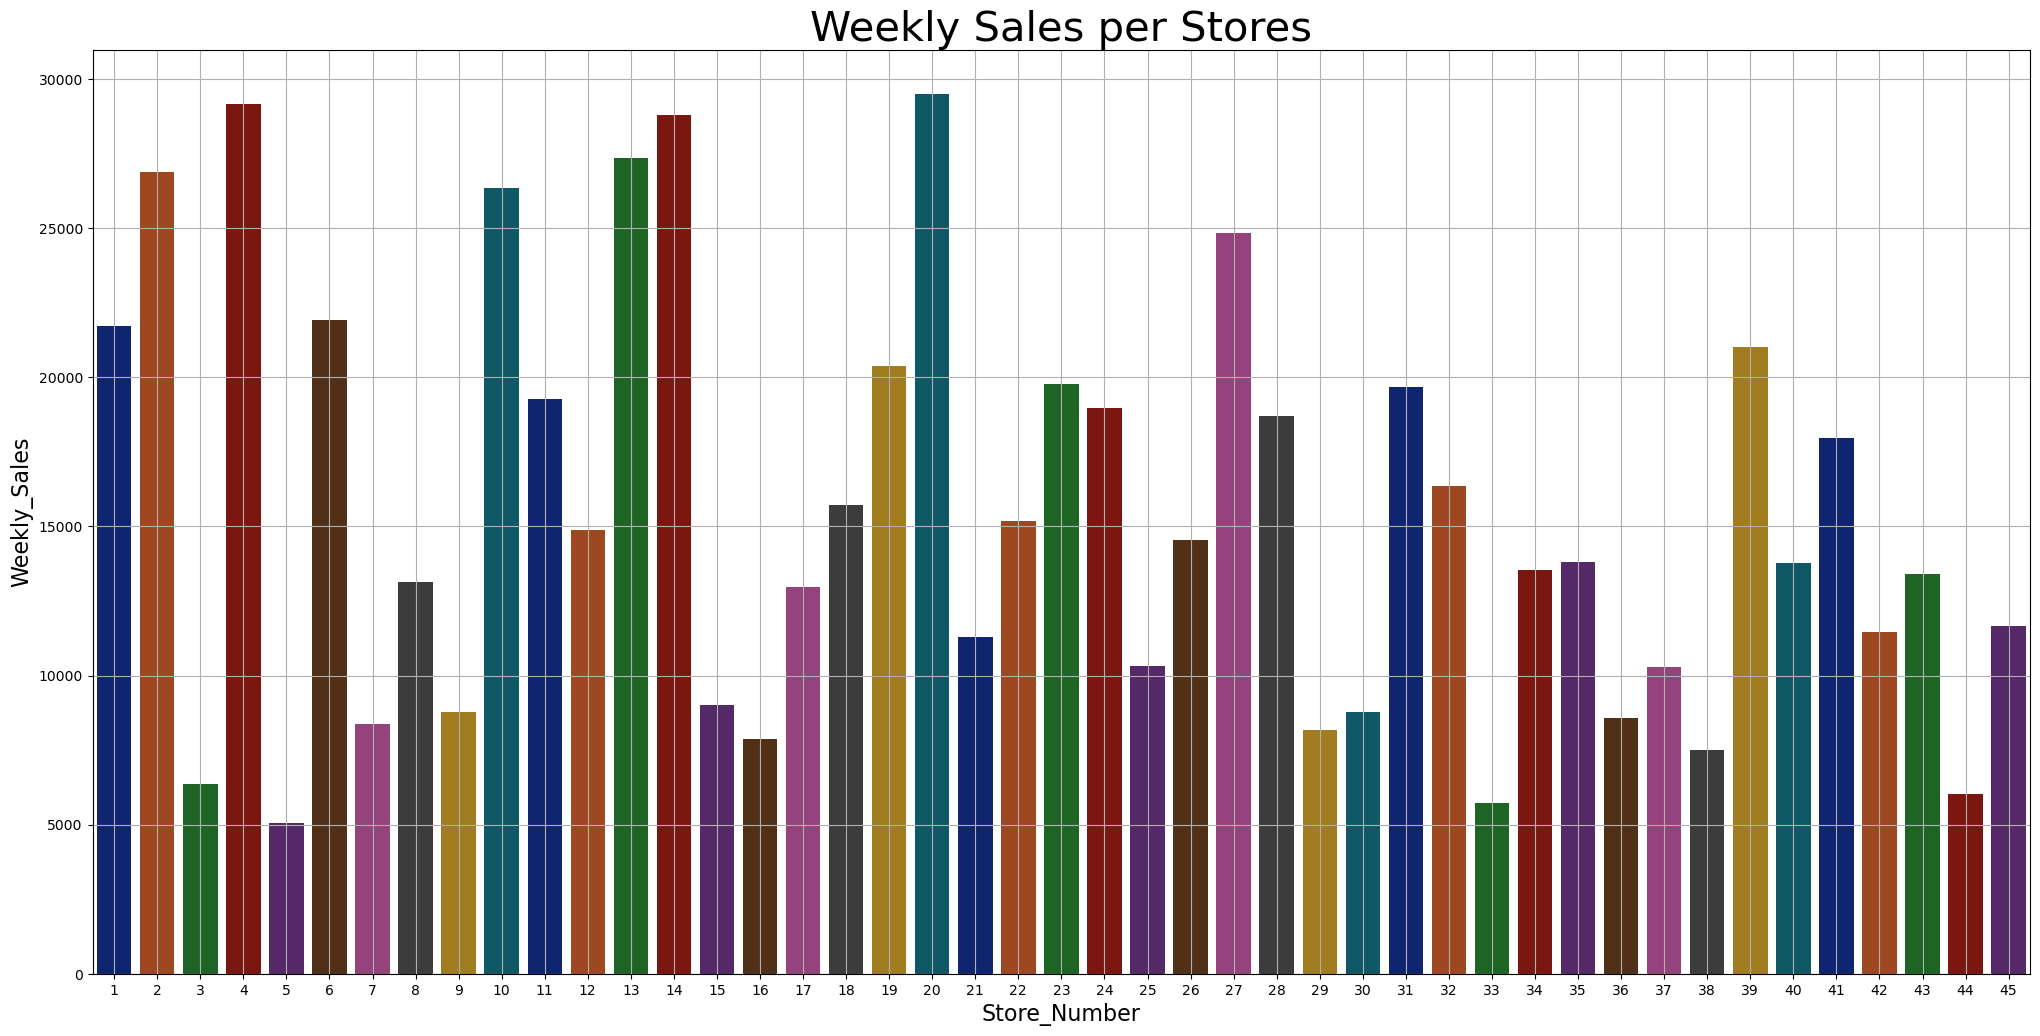

In [102]:
plt.figure(figsize=(25,12))
sns.barplot(x=Weekly_Stores.index, y=Weekly_Stores.values.reshape(-1,), palette='dark')
plt.grid()
plt.xlabel('Store_Number',fontsize=16)
plt.ylabel('Weekly_Sales',fontsize=16)
plt.title('Weekly Sales per Stores',fontsize=30)



In [103]:
#####
Week_dept = df['Weekly_Sales'].groupby(df['Dept']).mean()

In [104]:
Week_dept = pd.DataFrame(Week_dept)

In [105]:
Week_dept

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [106]:
Week_dept.sort_values('Weekly_Sales',ascending=False).style.bar(align='left')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


Text(0.5, 1.0, 'Weekly Sales per Department')

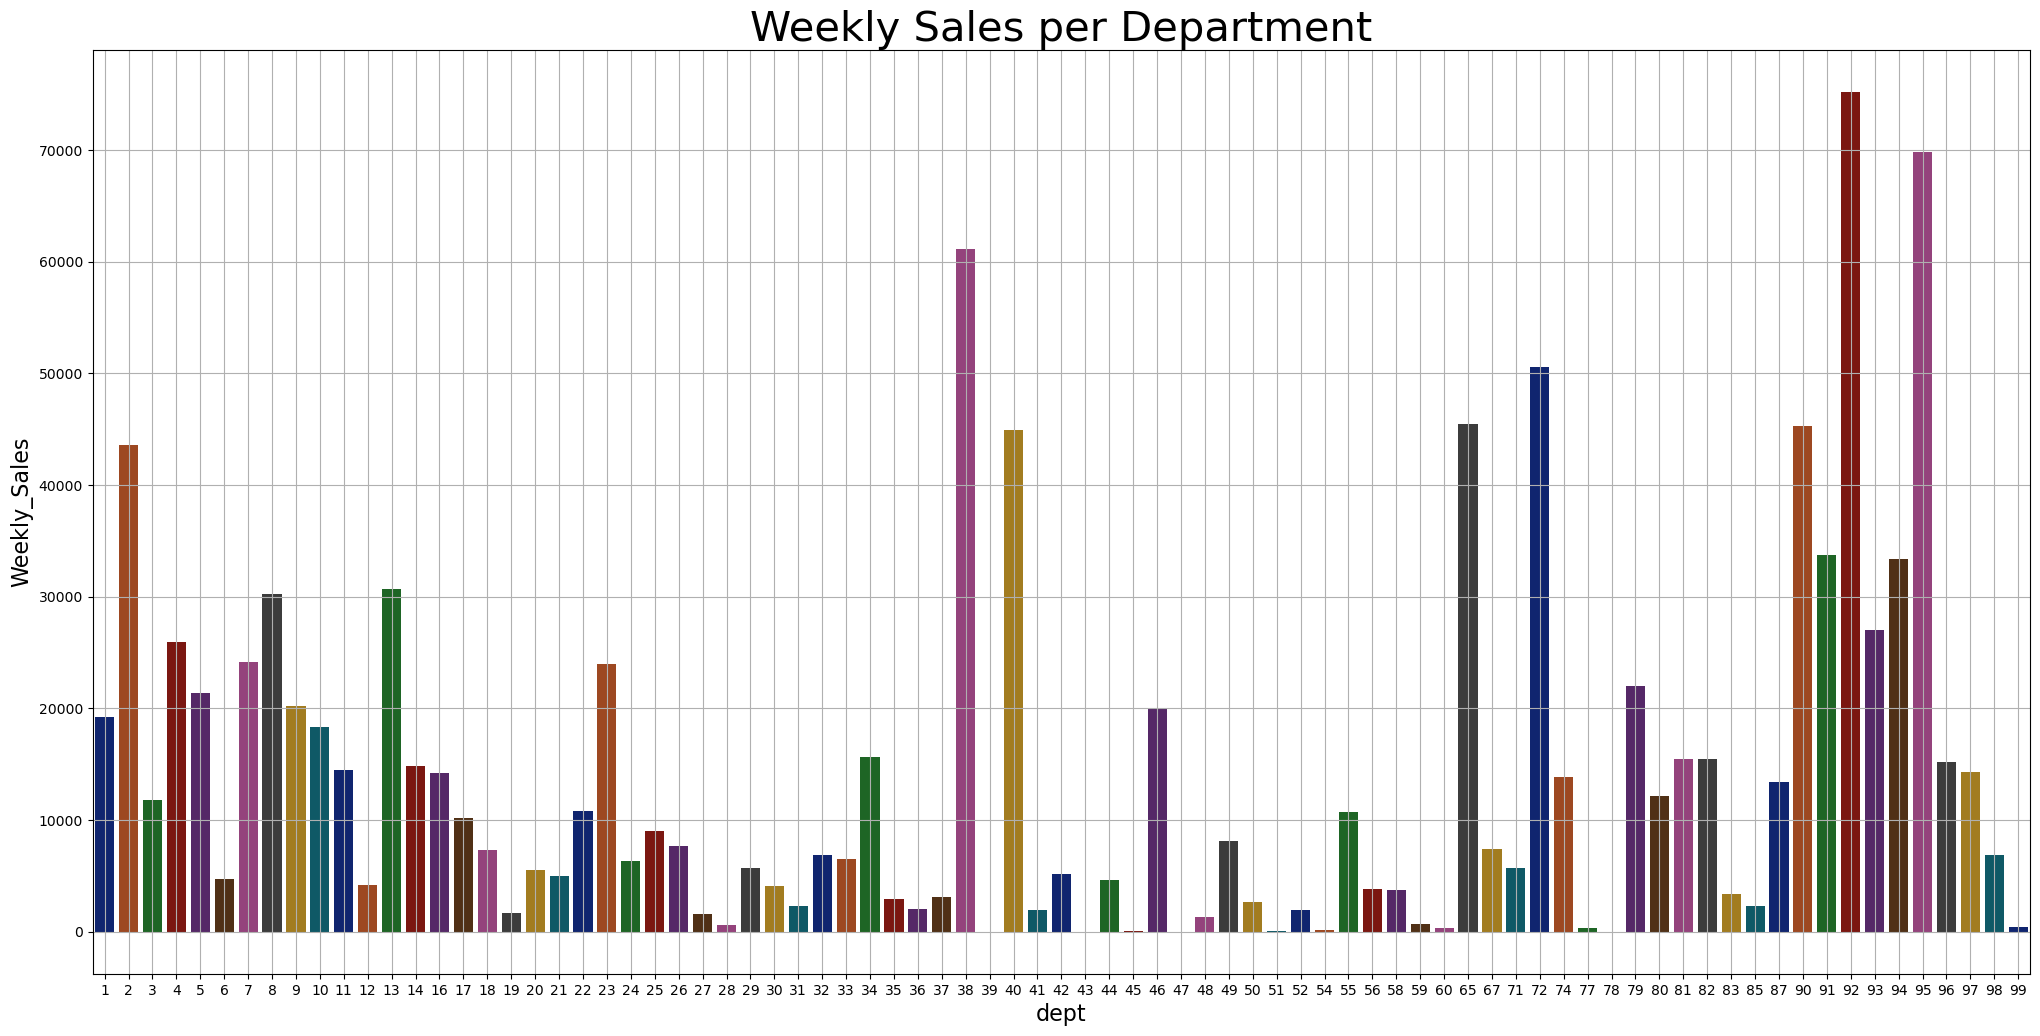

In [107]:
plt.figure(figsize=(25,12))
sns.barplot(x=Week_dept.index, y=Week_dept.values.reshape(-1,), palette='dark')
plt.grid()
plt.xlabel('dept',fontsize=16)
plt.ylabel('Weekly_Sales',fontsize=16)
plt.title('Weekly Sales per Department',fontsize=30)

C:\Users\cp\AppData\Local\Temp\ipykernel_11416\881351215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

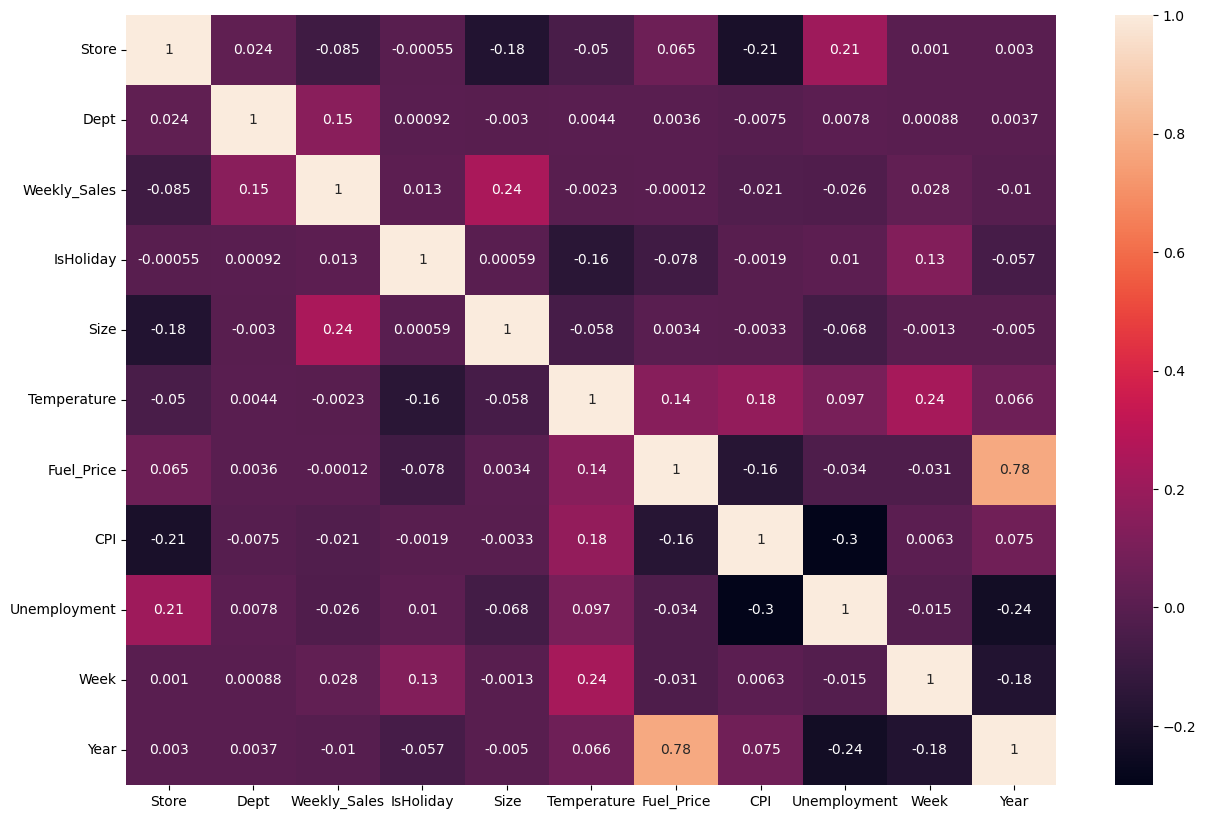

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [109]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,192.308899,8.667,43,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,192.308899,8.667,43,2012


In [110]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year'],
      dtype='object')

<Axes: xlabel='Type'>

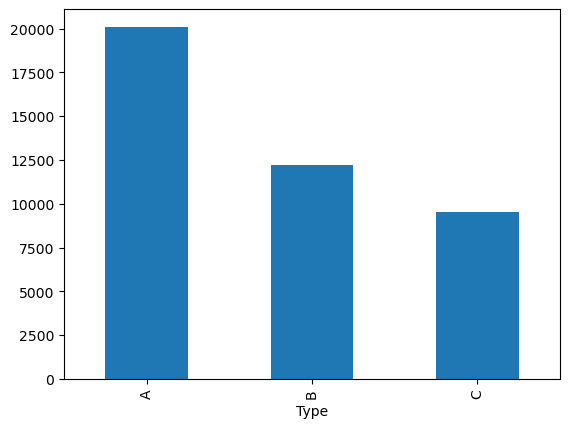

In [111]:
df.groupby(['Type'])['Weekly_Sales'].mean().plot(kind='bar')

<Axes: xlabel='Type', ylabel='Size'>

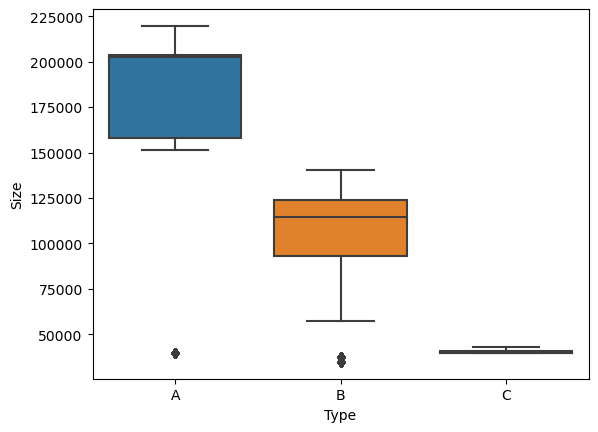

In [112]:
sns.boxplot(x='Type',y='Size',data=df)

<Axes: xlabel='Year'>

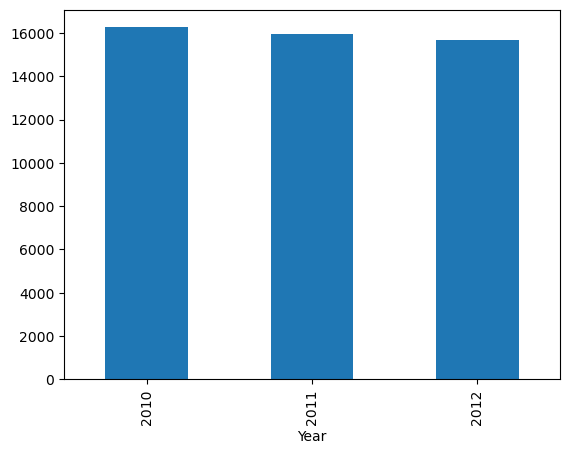

In [113]:
df.groupby(['Year'])['Weekly_Sales'].mean().plot(kind='bar')

<Axes: xlabel='Year'>

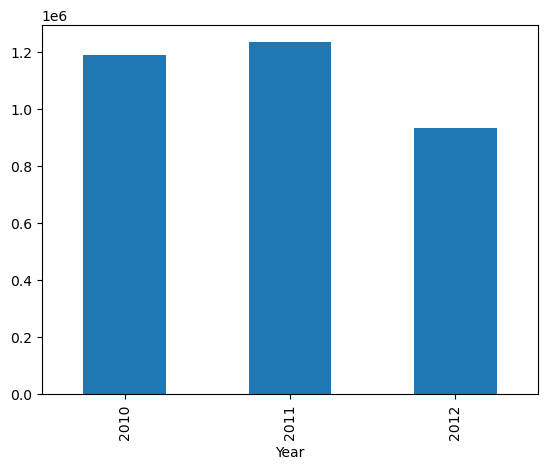

In [114]:
df.groupby(['Year'])['Unemployment'].sum().plot(kind='bar')

<Axes: xlabel='Year'>

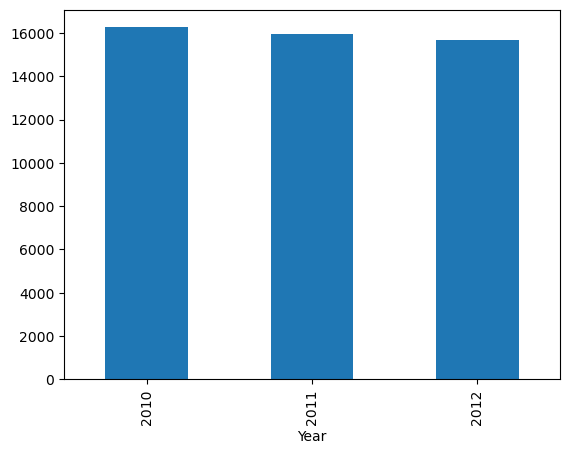

In [115]:
df.groupby(['Year'])['Weekly_Sales'].mean().plot(kind='bar')

<Axes: xlabel='Year'>

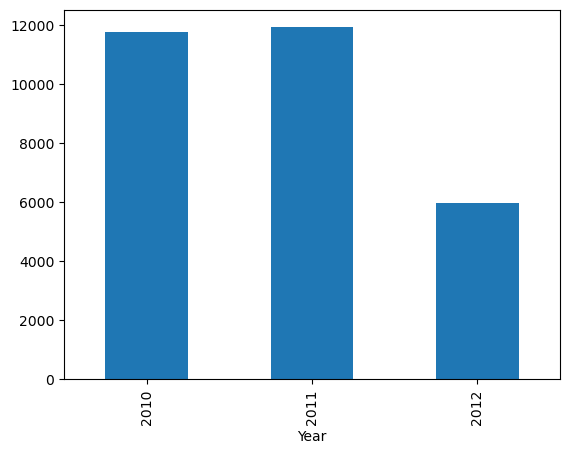

In [116]:
df.groupby(['Year'])['IsHoliday'].sum().plot(kind='bar')

In [117]:
df.groupby(['Dept'])['Unemployment'].sum()

Dept
1     51474.537
2     51474.537
3     51474.537
4     51474.537
5     50636.728
        ...    
95    51474.537
96    38100.479
97    50497.493
98    47338.673
99     6403.674
Name: Unemployment, Length: 81, dtype: float64

In [118]:
df.groupby(['Dept'])['Unemployment'].sum().sort_values()

Dept
43      113.320
39      130.531
77     1143.859
65     1420.677
78     1947.371
        ...    
67    51474.537
21    51474.537
38    51474.537
10    51474.537
1     51474.537
Name: Unemployment, Length: 81, dtype: float64

<Axes: xlabel='Dept'>

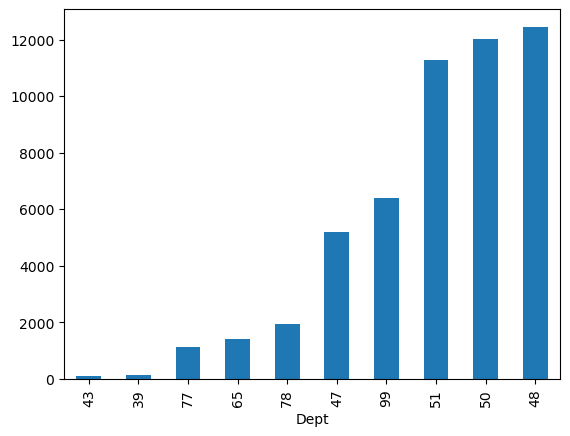

In [119]:
df.groupby(['Dept'])['Unemployment'].sum().sort_values().head(10).plot(kind='bar')

<Axes: xlabel='Dept'>

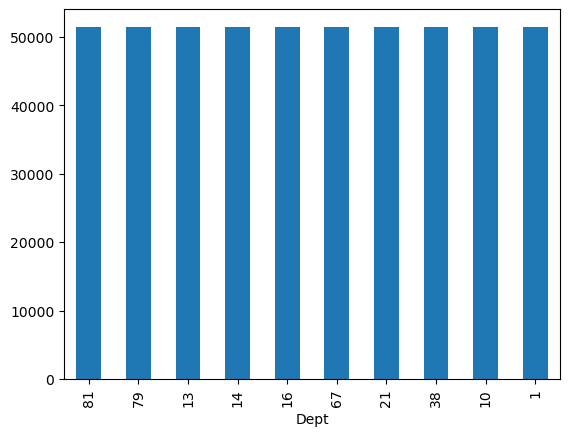

In [120]:
df.groupby(['Dept'])['Unemployment'].sum().sort_values().tail(10).plot(kind='bar')